# K-Means Actual

Para empezar, cargamos las librerías que vamos a necesitar:

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import sys



Cargamos el dataset con el que vamos a trabajar:

El algoritmo K-means tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en elegir unos centros iniciales.

In [2]:
def kmeans(K,experimentos,Centros_Iniciales,Df):

  data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
  D = np.array(pd.read_csv(data_file_url,header=0))
  D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
  Dx = D[:,0:2]
  Dy = D[:,2]
  print('El dataset cargado tiene',Dy.size,'instancias.')

  fig, ax = plt.subplots(figsize=(10,5))
  ax.scatter(Dx[:,0],Dx[:,1], c=Dy)


  for exp in range(experimentos):
    cDx = np.zeros(K*Dx.shape[1])
    cDx.shape = (K,Dx.shape[1])

    ##creacion de centros iniciales de forma aleatoria - forma tradicional
    if Centros_Iniciales == 'Original' :
      Alg="K-Means-original"
      def random_sample_float(n, mi, ma):
          return (ma - mi) * np.random.random_sample(n) + mi

      for d in np.arange(Dx.shape[1]):
          cDx[:,d] = random_sample_float(K, np.min(Dx[:,d]), np.max(Dx[:,d]))

    ##creacion de centros iniciales de forma optimizada opcion 1
    if Centros_Iniciales == 'Optimizado' :
      Alg="K-Means-Optimizado"
      c=Crear_centroides_iniciales(K,Dx)
      cDx = c.copy()

    print('Los centros iniciales elegidos aleatoriamente son:')
    print(cDx)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(Dx[:,0],Dx[:,1])
    ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')


    # Definimos la distancia euclidiana de una instancia x 
    # con respecto a un grupo de instancias C
    def distancia_euclidiana_grupo(x, C):   
        return np.sqrt(np.sum(np.power(C-x,2),axis=1))

    # Preparamos el vector donde guardamos la asignación de cada elemento 
    # a un clúster (1,...,K)
    Dyp = np.zeros(Dx.shape[0])

    fig1, ax = plt.subplots(figsize=(10,5))
    ax.scatter(Dx[:,0],Dx[:,1])
    ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

    # Flag de convergencia
    iterando = True
    iteracion_Bucle_principal = 0
    Iteraccion_Bucle_for_Busqueda_Centro=0
    iteraccion_bucle_for_Calculo_nuevos_centros=0


    while iterando:

        # Vector auxiliar para guardar los centros de la iteración pasada
        # necesarios para identificar la convergencia
        cDx_ant = cDx.copy()

        # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
        for i in np.arange(Dx.shape[0]):
            # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
            # a cada centro existente en cDx. Podemos utilizar para ello la función
            # distancia_euclidiana_grupo.
            distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i],cDx)## Tu código aquí ##
            # Una vez calculada la distancia, necesitamos averiguar el índice de
            # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
            pred_y = np.argmin(distancia_punto_a_centros)
            Dyp[i] = pred_y
            Iteraccion_Bucle_for_Busqueda_Centro=Iteraccion_Bucle_for_Busqueda_Centro+1

        # Calcular los nuevos centros
        for k in range(K):
            # Necesitamos recalcular la media de las coordenadas de los elementos 
            # asignados a cada cluster. Recordad que cDx es la matriz donde almacenamos
            # los centroides, así que tendrá la forma (k, 2).

            # Para calcular la media de los elementos de un cluster, primero necesitamos
            # saber qué elementos pertenecen a ese cluster, lo cual podemos obtener usando
            # `Dyp` y `k`. Esto nos devolverá un vector de booleanos que podremos usar con
            # `Dx` para obtener las coordenadas de los elementos del cluster `k`. Una vez
            # disponemos de dichas coordenadas, simplemente tenemos que calcular la media.
            # Tened en cuenta que `np.mean` reduce la media a 1 único valor, y nosotros 
            # necesitamos 2 valores, uno para la coordenada x y otro para la y.
            # Podéis usar el argumento `axis` para indicarle a np.mean sobre qué dimensión
            # de la matriz de puntos `Dx` queréis realizar la media.
            cDx[k,:] = ([np.mean(Dx[Dyp == k][:,0]), np.mean(Dx[Dyp == k][:,1])])## Tu código aquí ##
            iteraccion_bucle_for_Calculo_nuevos_centros=iteraccion_bucle_for_Calculo_nuevos_centros+1

        for k in np.arange(K):
            ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
        iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
        iteracion_Bucle_principal=iteracion_Bucle_principal+1
        error = np.absolute(np.sum(cDx-cDx_ant))
        print('Error en Iteracion-'+str(iteracion_Bucle_principal)+': '+ str(error))
        
    print('iteracion Bucle Principal: '+ str(iteracion_Bucle_principal))
    print('iteracion Bucle Bisqueda Centro: '+ str(Iteraccion_Bucle_for_Busqueda_Centro))
    print('iteracion Bucle calculo nuevos Centros: '+ str(iteraccion_bucle_for_Calculo_nuevos_centros))
    ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

    # Ver asignaciones finales
    fig2, ax = plt.subplots(figsize=(10,5))
    ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
    ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')


    ## medidas
    from sklearn.metrics.cluster import contingency_matrix

    def medida_error(mat):
        maxs = np.zeros(mat.shape[0])
        for l in np.arange(mat.shape[0]):
            maxs[l] = np.max(mat[l, :])
        maxs = np.sum(maxs)
        return 1 - maxs / np.sum(mat)

    def medida_pureza(mat):
        totales = np.sum(mat, 0) / np.sum(mat)
        precision_kl = np.zeros(mat.shape[1])
        for k in np.arange(mat.shape[1]):
            precision_kl[k] = np.max(mat[:, k] / np.sum(mat[:, k]))
        return np.sum(totales * precision_kl)

    def medida_precision(mat, l, k):
        return mat[l,k]/np.sum(mat[:,k])

    def medida_recall(mat, l, k):
        return mat[l,k]/np.sum(mat[l,:])

    def medida_f1_especifica(mat, l, k):
        prec = medida_precision(mat, l, k)
        rec = medida_recall(mat, l, k)
        if (prec+rec)==0:
            return 0
        else:
            return 2*prec*rec/(prec+rec)

    def medida_f1(mat):
        totales = np.sum(mat, 1) / np.sum(mat)
        f1 = np.zeros(mat.shape)
        for l in np.arange(mat.shape[0]):
            for k in np.arange(mat.shape[1]):
                f1[l, k] = medida_f1_especifica(mat, l, k)
        f1 = np.sum(totales * np.max(f1, axis=1))
        return f1

    mC = contingency_matrix(Dy,Dyp)
    mE = medida_error(mC)
    mP = medida_pureza(mC)
    mF1 = medida_f1(mC)

    print('Matriz de confusión:\n', mC)
    print(f'El valor del error cometido es = {mE}')
    print(f'La pureza del agrupamiento obtenido es = {mP}')
    print(f'El valor F1 es = {mF1}')
    vresultados = {
          "Algoritmo"         : Alg,
          "Clusters"          : K,
          "experimento"       : exp,
          "Nro_iteraciones"   : iteracion_Bucle_principal,
          "Error"             : mE,
          "Pureza"            : mP,
          "F1"                : mF1
    }
    Df = Df.append(vresultados,ignore_index=True)  

  # display(Df)
  return Df

In [65]:
## opcion 2  Mejoramiento K-means-centroides iniciales 2.pdf
# K = 3 
# Definimos la distancia euclidiana de una instancia x 
# def distancia_euclidiana_grupo(x, C):   
#     return np.sqrt(np.sum(np.power(C-x,2)))

def Crear_centroides_iniciales (K,Dx) :
  c = np.zeros(K*Dx.shape[1])
  c.shape = (K,Dx.shape[1])

  Resultados_df = pd.DataFrame(columns=["Punto","Punto_x","Punto_y","Peso_componentes"]) # creo un data frame para almacenar toda la info y hacer los calculos mas facil
  cOrigen = np.zeros(Dx.shape[1])

  
#   MaxX1 = np.max(Dx[:,0])
#   MaxX2 = np.max(Dx[:,1])


#   for i in np.arange(Dx.shape[0]):
#     # calculo el peso (sumatoria de la multriplicacion de la distancia E por cada componente del punto)
#     W = (Dx[i,0] / MaxX1) + (Dx[i,1] / MaxX2)  
#     resultados = {
#         "Punto"             : Dx[i],
#         "Punto_x"           : Dx[i,0],
#         "Punto_y"           : Dx[i,1],
#         "Peso_componentes"  : W
#     }
#     Resultados_df = Resultados_df.append(resultados,ignore_index=True)  # almaceno los resultados en el data frame

  Resultados_df = pd.DataFrame()
  Resultados_df["Punto"] = range(len(Dx))
  maximos = np.max(Dx, axis=0)
   # 1/maximos
  Resultados_df["Punto_x"] = Dx[:,0]
  Resultados_df["Punto_y"] = Dx[:,1]
  Resultados_df["Peso_componentes"] = np.dot(Dx, 1/maximos)
  
  Resultados_dfOrder = Resultados_df.sort_values('Peso_componentes')  # los organizo segun el peso
  display(Resultados_dfOrder)

  n=(len(Dx))

  posciones = []
  mean = []
  # encontramos numero de registros para dividir el dataset, N/K
  ksubsets = int(n / K)
  # Calculamos las posciones donde se deben partir los datos
  for i in range(K) :
    resul = int((i+1)*ksubsets)
    posciones.append(resul)
  posciones.sort(reverse=False)
  print('Posciones')
  print(posciones)
  # calculamos la media de cada subset
  contador2 = 0
  sum = 0
  for contador in range(n) :
    if  contador in posciones : 
      mean.append(sum/contador2)
      contador2 = 0
      sum = 0
    contador2 = contador2 + 1
    sum = sum + Resultados_dfOrder.iloc[contador, 3] 
  print('mean')
  print(mean)

  # Encontramos el data point que esta cerca a la media del subset
  contador = 0
  posvector = 0
  for contador in range(n) :
    if Resultados_dfOrder.iloc[contador, 3] > mean[posvector] :
      c[posvector,0] = Resultados_dfOrder.iloc[contador-1,1]
      c[posvector,1] = Resultados_dfOrder.iloc[contador-1,2]
      posvector = posvector + 1
    if posvector == K :
      break
  return c


In [6]:
data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
Dy = D[:,2]

In [8]:
K=3
c = np.zeros(K*Dx.shape[1])
c.shape = (K,Dx.shape[1])

Resultados_df = pd.DataFrame(columns=["Punto","Punto_x","Punto_y","Peso_componentes"]) # creo un data frame para almacenar toda la info y hacer los calculos mas facil
cOrigen = np.zeros(Dx.shape[1])

In [30]:
MaxX1 = np.max(Dx[:,0])
MaxX2 = np.max(Dx[:,1])
print(MaxX1)
print(MaxX2)

241.71
100.0


In [42]:
for i in np.arange(Dx.shape[0]):
    # calculo el peso (sumatoria de la multriplicacion de la distancia E por cada componente del punto)
    W = (Dx[i,0] / MaxX1) + (Dx[i,1] / MaxX2)  
    resultados = {
        "Punto"             : Dx[i],
        "Punto_x"           : Dx[i,0],
        "Punto_y"           : Dx[i,1],
        "Peso_componentes"  : W
    }
    Resultados_df = Resultados_df.append(resultados,ignore_index=True)

In [36]:
pesos_juan = np.array(Resultados_df["Peso_componentes"])

In [37]:
pesos_juan

array([0.314608  , 0.76716313, 0.84508916, ..., 0.25185346, 0.26466137,
       0.22772827])

array([0.00413719, 0.01      ])

In [41]:
pesos_esteban = np.dot(Dx, 1/maximos)

In [40]:
pesos_esteban - pesos_juan

array([-5.55111512e-17, -1.11022302e-16, -1.11022302e-16, ...,
        0.00000000e+00, -5.55111512e-17, -2.77555756e-17])

In [60]:
resultados_df = pd.DataFrame()

In [61]:
resultados_df

""


In [62]:
maximos = np.max(Dx, axis=0)
# 1/maximos
resultados_df["Punto_x"] = Dx[:,0]
resultados_df["Punto_y"] = Dx[:,1]

resultados_df["Peso_componentes"] = np.dot(Dx, 1/maximos)

array([[ 54.29,   9.  ,   2.  ],
       [161.26,  10.  ,   3.  ],
       [168.01,  15.  ,   3.  ],
       ...,
       [ 48.79,   5.  ,   2.  ],
       [ 56.72,   3.  ,   2.  ],
       [ 50.21,   2.  ,   2.  ]])

In [52]:
resultados_df

,Punto_x,Punto_y,Peso_componentes
0,54.29,9.0,0.314608
1,161.26,10.0,0.767163
2,168.01,15.0,0.845089
3,155.02,9.0,0.731347
4,54.32,5.0,0.274732
...,...,...,...
1994,56.08,8.0,0.312014
1995,35.87,35.0,0.498401
1996,48.79,5.0,0.251853
1997,56.72,3.0,0.264661


In [53]:
Resultados_df

,Punto,Punto_x,Punto_y,Peso_componentes
0,"[54.29, 9.0]",54.29,9.0,0.314608
1,"[161.26, 10.0]",161.26,10.0,0.767163
2,"[168.01, 15.0]",168.01,15.0,0.845089
3,"[155.02, 9.0]",155.02,9.0,0.731347
4,"[54.32, 5.0]",54.32,5.0,0.274732
...,...,...,...,...
3993,"[56.08, 8.0]",56.08,8.0,0.312014
3994,"[35.87, 35.0]",35.87,35.0,0.498401
3995,"[48.79, 5.0]",48.79,5.0,0.251853
3996,"[56.72, 3.0]",56.72,3.0,0.264661


In [69]:
Crear_centroides_iniciales(3,Dx)

,Punto,Punto_x,Punto_y,Peso_componentes
1526,1526,32.72,0.0,0.135369
1027,1027,34.95,0.0,0.144595
1561,1561,28.16,3.0,0.146503
911,911,30.61,2.0,0.146639
770,770,28.32,3.0,0.147165
...,...,...,...,...
542,542,158.47,100.0,1.655620
1080,1080,179.22,95.0,1.691467
1228,1228,182.53,99.0,1.745161
1880,1880,192.37,99.0,1.785871


Posciones
[666, 1332, 1998]
mean
[0.22042264928450864, 0.2898690765980078, 0.738427558749019]


array([[ 38.76,   6.  ],
       [ 60.38,   4.  ],
       [141.96,  15.  ]])

El dataset cargado tiene 1999 instancias.
Los centros iniciales elegidos aleatoriamente son:
[[220.80494418  30.2127365 ]
 [ 47.59924816  44.20663245]
 [ 41.49256846  31.02474709]]
Error en Iteracion-1: 65.37947759285758
Error en Iteracion-2: 11.804545452509252
Error en Iteracion-3: 3.0038228788187897
Error en Iteracion-4: 0.29881593638673554
Error en Iteracion-5: 0.20746695690962902
Error en Iteracion-6: 0.13074851255609765
Error en Iteracion-7: 0.0
iteracion Bucle Principal: 7
iteracion Bucle Bisqueda Centro: 13993
iteracion Bucle calculo nuevos Centros: 21
Matriz de confusión:
 [[  49    0    0]
 [   0    0 1393]
 [ 346    0    0]
 [   0  206    5]]
El valor del error cometido es = 0.002501250625312701
La pureza del agrupamiento obtenido es = 0.9729864932466232
El valor F1 es = 0.966938432186003
Los centros iniciales elegidos aleatoriamente son:
[[211.00960343  25.75958649]
 [134.48301373  92.46190092]
 [120.69910142  66.95043406]]
Error en Iteracion-1: 146.40458381552907
Error en I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Error en Iteracion-1: 87.69738597329334
Error en Iteracion-2: 5.335216051002061
Error en Iteracion-3: 0.2714368805289027
Error en Iteracion-4: 0.2289483580606264
Error en Iteracion-5: 0.17074215141690008
Error en Iteracion-6: 0.04809633066567098
Error en Iteracion-7: 0.04473962993582603
Error en Iteracion-8: 0.07975431054307247
Error en Iteracion-9: 0.100171466393836
Error en Iteracion-10: 0.12904806820620607
Error en Iteracion-11: 0.011109157012029414
Error en Iteracion-12: 0.000940003435676573
Error en Iteracion-13: 0.043776769066230514
Error en Iteracion-14: 0.03297762524527137
Error en Iteracion-15: 0.008918835201709996
Error en Iteracion-16: 0.006395541415152195
Error en Iteracion-17: 0.03375720136937943
Error en Iteracion-18: 0.03240792913124757
Error en Iteracion-19: 0.01223085830256565
Error en Iteracion-20: 0.009716617589388576
Error en Iteracion-21: 0.09874879823496485
Error en Iteracion-22: 0.07590827402296796
Error en Iteracion-23: 0.09567568914051794
Error en Iteracion-24:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Matriz de confusión:
 [[  0  49   0]
 [671   0 722]
 [  0 345   1]
 [ 76   0 135]]
El valor del error cometido es = 0.3741870935467734
La pureza del agrupamiento obtenido es = 0.8694347173586794
El valor F1 es = 0.6404969669597831
Los centros iniciales elegidos aleatoriamente son:
[[ 37.59560383  65.05354242]
 [181.1272126   97.28436519]
 [ 53.98515795  38.88932788]]
Error en Iteracion-1: 123.57932150521118
Error en Iteracion-2: 9.654290261467562
Error en Iteracion-3: 4.478098067955376
Error en Iteracion-4: 1.2754489264853195
Error en Iteracion-5: 0.3013030929785181
Error en Iteracion-6: 0.13074851255609765
Error en Iteracion-7: 0.0
iteracion Bucle Principal: 7
iteracion Bucle Bisqueda Centro: 13993
iteracion Bucle calculo nuevos Centros: 21
Matriz de confusión:
 [[   0   49    0]
 [   0    0 1393]
 [   0  346    0]
 [ 206    0    5]]
El valor del error cometido es = 0.002501250625312701
La pureza del agrupamiento obtenido es = 0.9729864932466232
El valor F1 es = 0.966938432186003
Los 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


,Punto,Punto_x,Punto_y,Peso_componentes
1970,1970,32.72,0.0,0.135369
1815,1815,34.95,0.0,0.144595
757,757,28.16,3.0,0.146503
924,924,30.61,2.0,0.146639
1828,1828,28.32,3.0,0.147165
...,...,...,...,...
1499,1499,158.47,100.0,1.655620
1442,1442,179.22,95.0,1.691467
439,439,182.53,99.0,1.745161
1572,1572,192.37,99.0,1.785871


Posciones
[666, 1332, 1998]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


mean
[0.22042264928450864, 0.2898690765980078, 0.738427558749019]
Los centros iniciales elegidos aleatoriamente son:
[[ 38.76   6.  ]
 [ 60.38   4.  ]
 [141.96  15.  ]]
Error en Iteracion-1: 47.28438188364133
Error en Iteracion-2: 0.21278580847666362


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Error en Iteracion-3: 0.025505471295620197
Error en Iteracion-4: 0.009546753719858359
Error en Iteracion-5: 0.006434696107822546
Error en Iteracion-6: 0.034094130601065586
Error en Iteracion-7: 0.05235405065337417
Error en Iteracion-8: 0.012230858302558545
Error en Iteracion-9: 0.009716617589395682
Error en Iteracion-10: 0.09874879823495775
Error en Iteracion-11: 0.07590827402296796
Error en Iteracion-12: 0.09567568914051083
Error en Iteracion-13: 0.07493384298897965
Error en Iteracion-14: 0.051434850877541294
Error en Iteracion-15: 0.025196608302329615
Error en Iteracion-16: 0.0
iteracion Bucle Principal: 16
iteracion Bucle Bisqueda Centro: 31984
iteracion Bucle calculo nuevos Centros: 48
Matriz de confusión:
 [[  0   0  49]
 [671 722   0]
 [  0   1 345]
 [ 76 135   0]]
El valor del error cometido es = 0.3741870935467734
La pureza del agrupamiento obtenido es = 0.8694347173586793
El valor F1 es = 0.6404969669597831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,Algoritmo,Clusters,experimento,Nro_iteraciones,Error,Pureza,F1
0,K-Means-original,3,0,7,0.002501,0.972986,0.966938
1,K-Means-original,3,1,5,0.001501,0.892946,0.868407
2,K-Means-original,3,2,5,0.001501,0.892946,0.868407
3,K-Means-original,3,3,4,0.001501,0.892946,0.868407
4,K-Means-original,3,4,4,0.001501,0.892946,0.868407
5,K-Means-original,3,5,13,0.085043,0.869935,0.798770
6,K-Means-original,3,6,27,0.374187,0.869435,0.640497
7,K-Means-original,3,7,7,0.002501,0.972986,0.966938
8,K-Means-original,3,8,3,0.001501,0.892946,0.868407
9,K-Means-original,3,9,5,0.002501,0.972986,0.966938


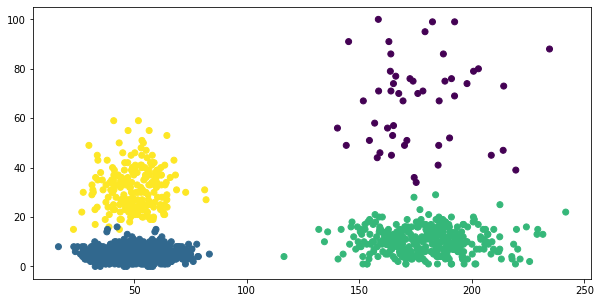

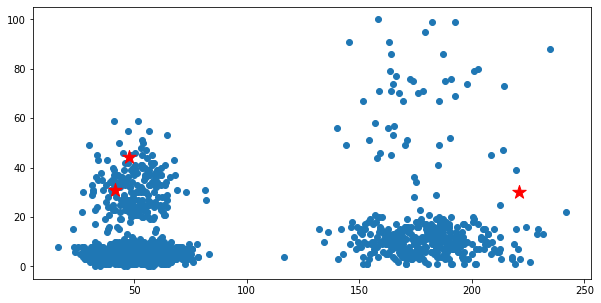

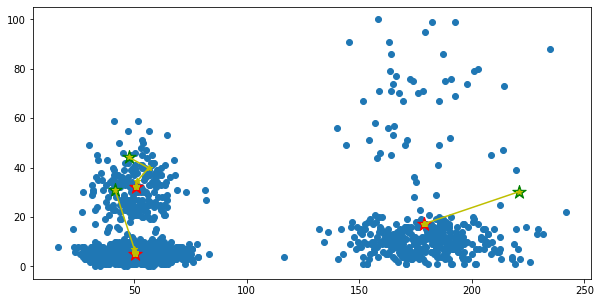

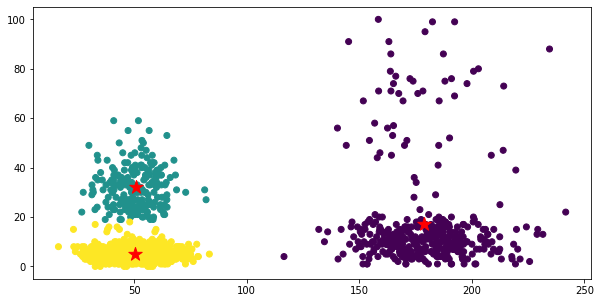

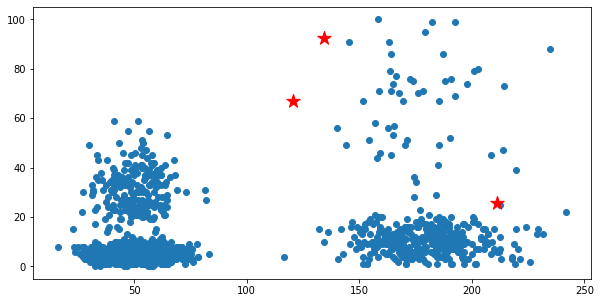

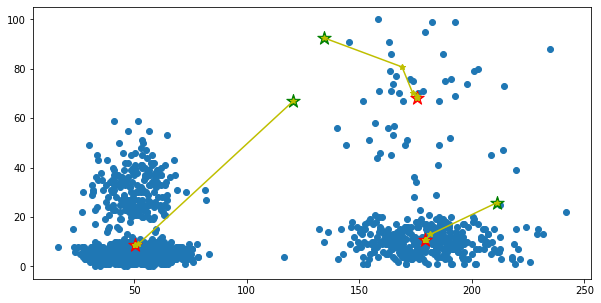

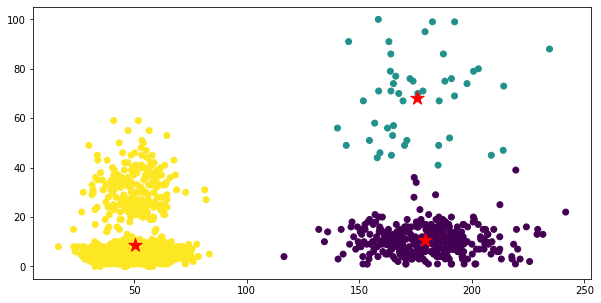

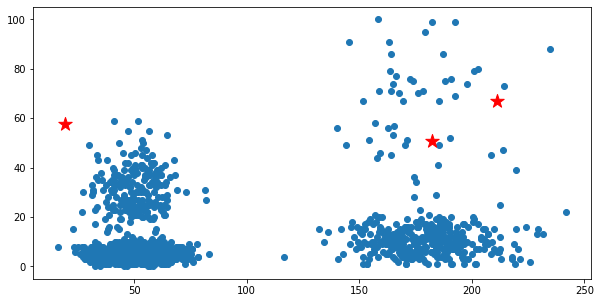

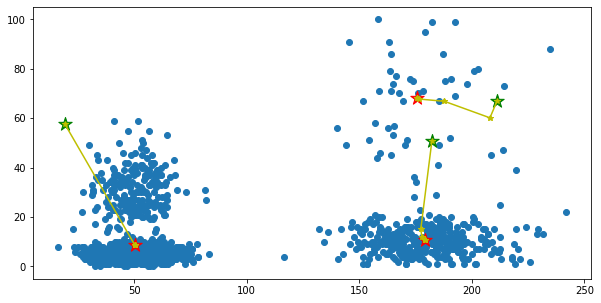

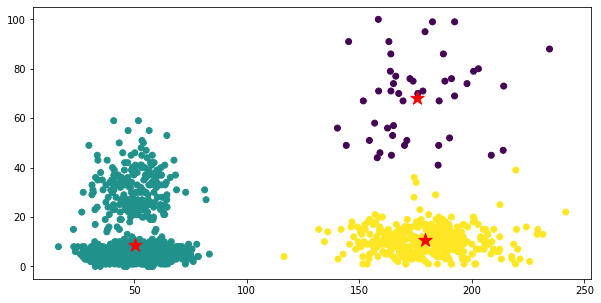

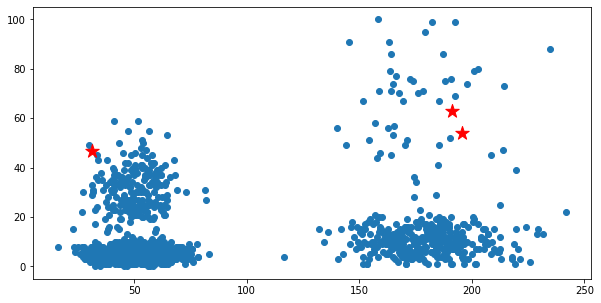

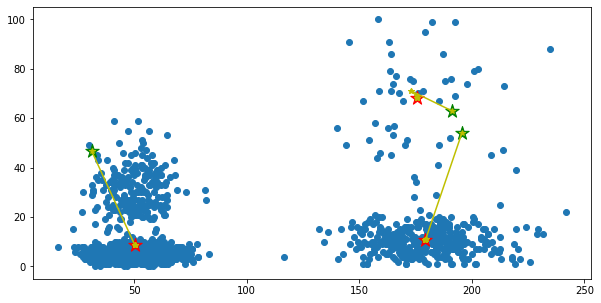

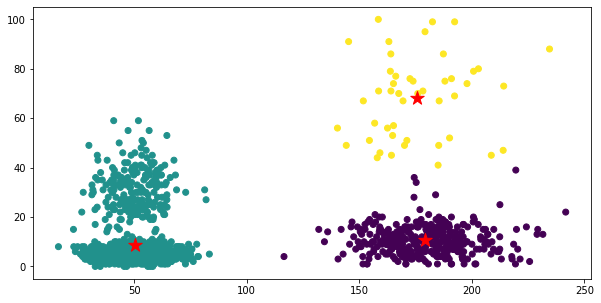

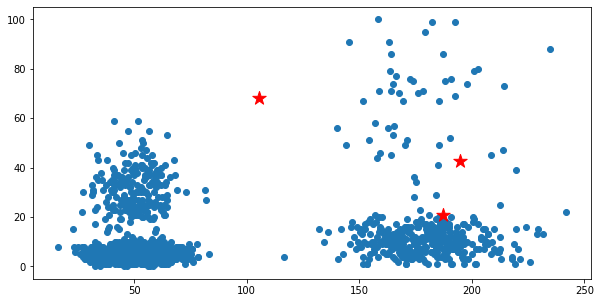

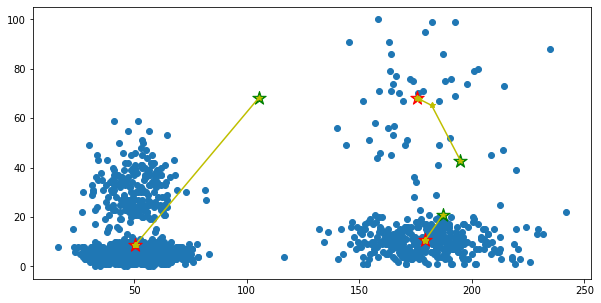

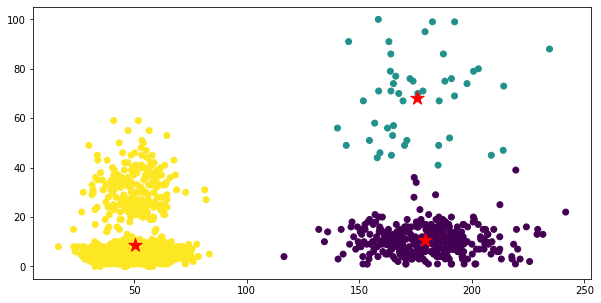

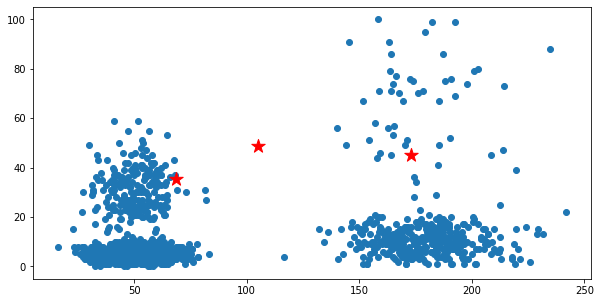

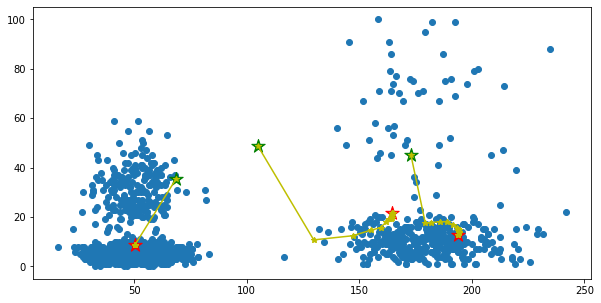

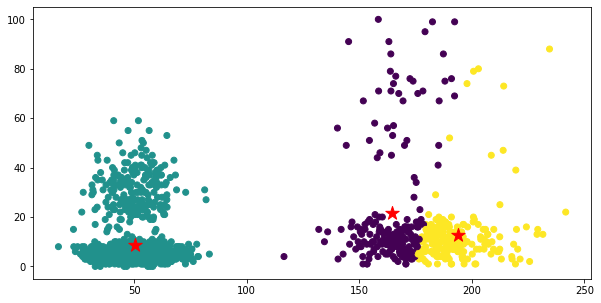

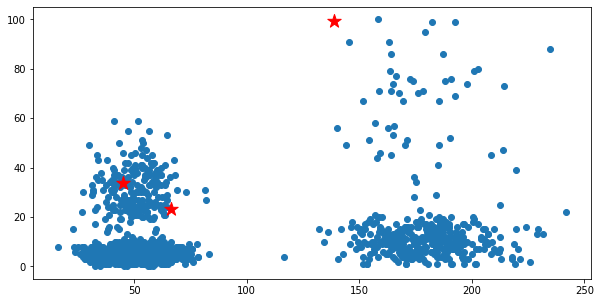

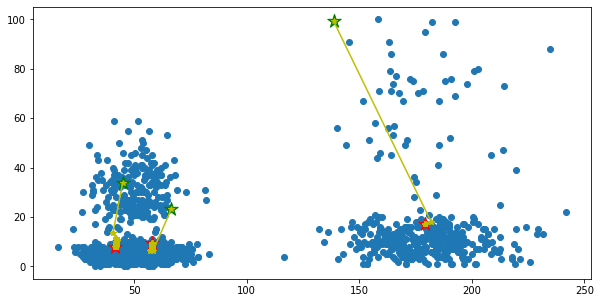

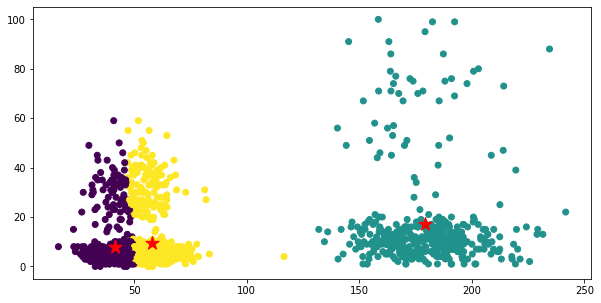

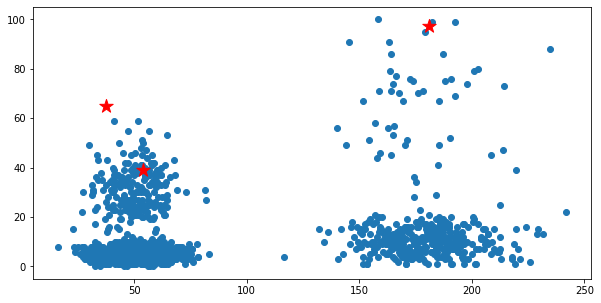

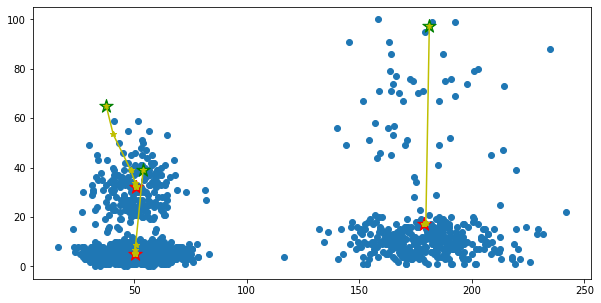

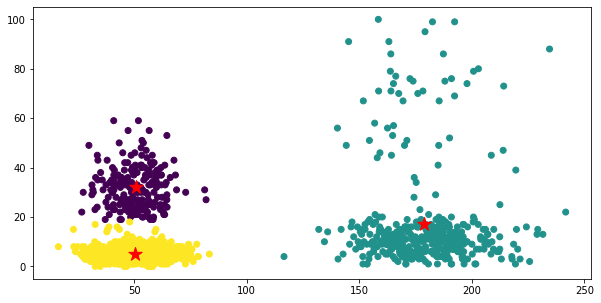

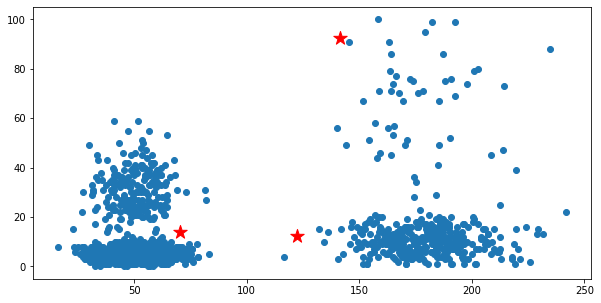

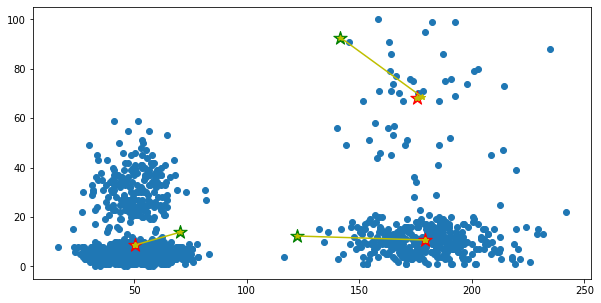

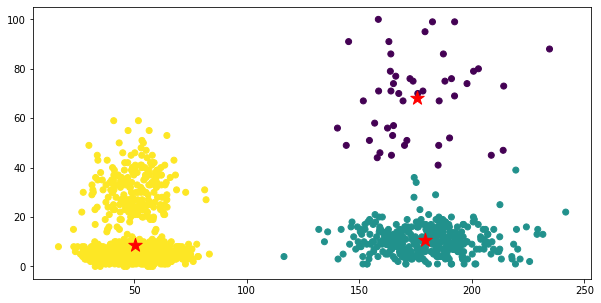

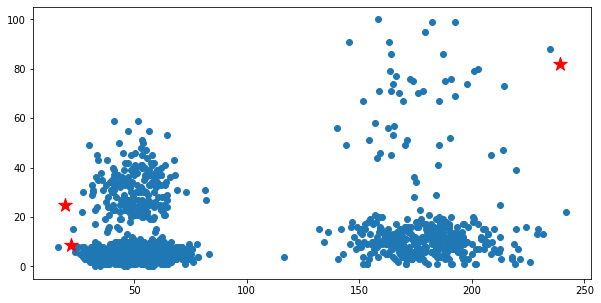

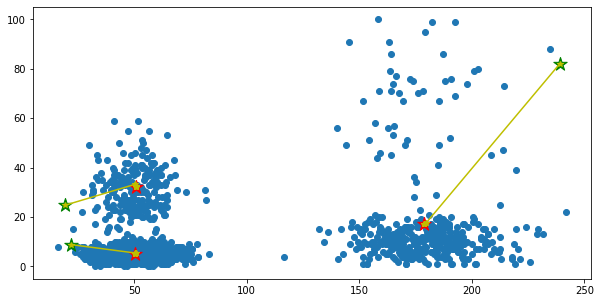

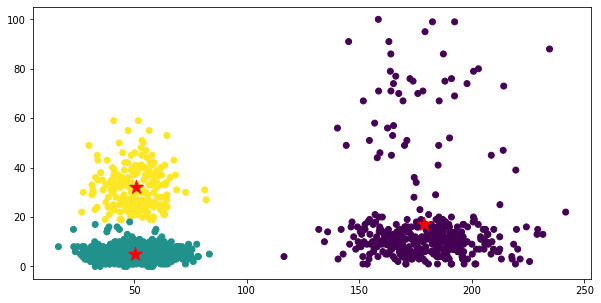

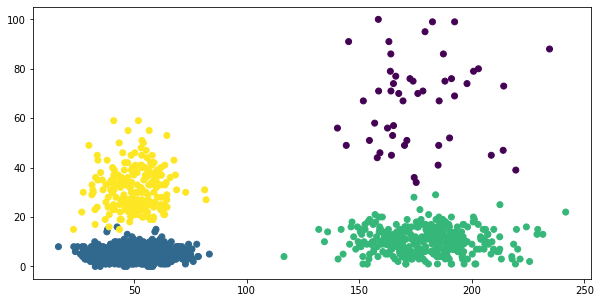

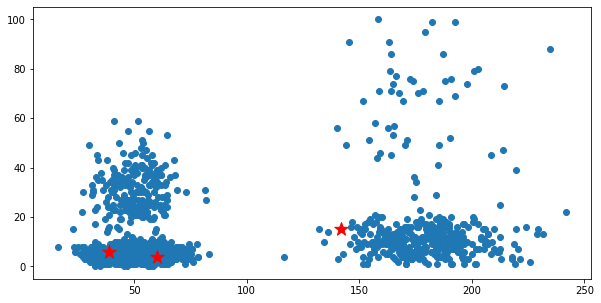

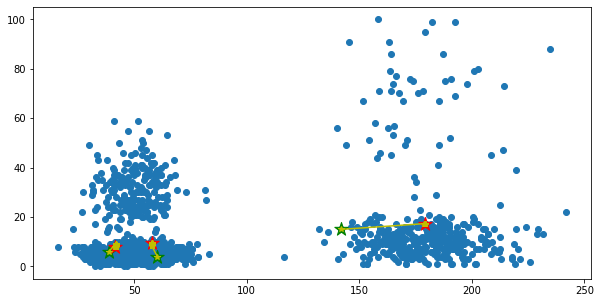

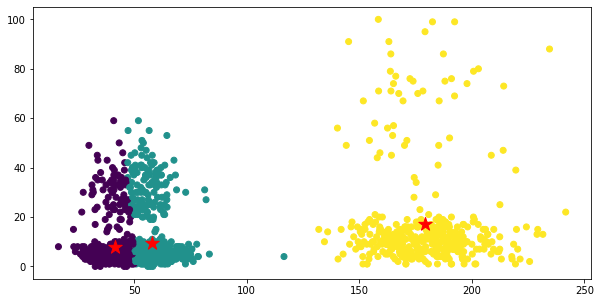

In [70]:
## llamdao principal
# Elegimos un número de clústeres a buscar

# creamos data frame para guardar los resultados del analisis
Analisis_Df = pd.DataFrame(columns=["Algoritmo","Clusters","experimento","Nro_iteraciones","Error","Pureza","F1"]) 

np.random.seed(17) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

K = 3
experimentos = 10
Analisis_Df2=kmeans(K,experimentos,'Original',Analisis_Df)

## llamdao principal optimizado
# Elegimos un número de clústeres a buscar
experimentos = 1
Analisis_Df3=kmeans(K,experimentos,'Optimizado',Analisis_Df2)
display(Analisis_Df3)


# K-Means Optimizacion

In [ ]:
# # opcion 1 con formula de la investigacion
# # Definimos la distancia euclidiana de una instancia x 
# def distancia_euclidiana_grupo(x, C):   
#     return np.sqrt(np.sum(np.power(C-x,2)))

# def Crear_centroides_iniciales (K,Dx) :
#   c = np.zeros(K*Dx.shape[1])
#   c.shape = (K,Dx.shape[1])

#   Resultados_df = pd.DataFrame(columns=["Punto","Punto_x","Punto_y","Distancia_origen","Peso_componentes"]) # creo un data frame para almacenar toda la info y hacer los calculos mas facil
#   cOrigen = np.zeros(Dx.shape[1])

#   for i in np.arange(Dx.shape[0]):
#     E = distancia_euclidiana_grupo(Dx[i],cOrigen) # calculo la distancia euclidiana con la funcion del profe, desde el origen a cada punto de datos
#     W = (Dx[i,0] * E) + (Dx[i,1] * E)  # calculo el peso (sumatoria de la multriplicacion de la distancia E por cada componente del punto)
#     resultados = {
#         "Punto"             : Dx[i],
#         "Punto_x"           : Dx[i,0],
#         "Punto_y"           : Dx[i,1],
#         "Distancia_origen"  : E,
#         "Peso_componentes"  : W
#     }
#     Resultados_df = Resultados_df.append(resultados,ignore_index=True)  # almaceno los resultados en el data frame
#   # display(Resultados_df)
#   Resultados_dfOrder = Resultados_df.sort_values('Peso_componentes')  # los organizo segun el peso

#   n=(len(Dx))
#   for conta in range(K) :
#     vble=conta+1
#     #(n (2k -1) + k) / 2k formula de la investigacion
#     pos = (n*((2*vble) -1) + vble) / (2*vble)  # aplico la formula de la investigacion para encontrar la posicion del centroide que se propone
#     pos = int(pos)
#     c[conta,0] = Resultados_dfOrder.iloc[pos, 1] # se almacena la coordinada x del centroide encontrado en la poscion como centroide inicial
#     c[conta,1] = Resultados_dfOrder.iloc[pos, 2] # se almacena la coordinada y del centroide encontrado en la poscion como centroide inicial
#   return c




In [ ]:
# # opcion 1 sugiriendo la ubicacion del data point sin aplicar formula
# # Definimos la distancia euclidiana de una instancia x 
# def distancia_euclidiana_grupo(x, C):   
#     return np.sqrt(np.sum(np.power(C-x,2)))

# def Crear_centroides_iniciales (K,Dx) :
#     c = np.zeros(K*Dx.shape[1])
#     c.shape = (K,Dx.shape[1])

#     c2 = np.zeros(K*Dx.shape[1])
#     c2.shape = (K,Dx.shape[1])

#     Resultados_df = pd.DataFrame(columns=["Punto","Punto_x","Punto_y","Distancia_origen","Peso_componentes"]) # creo un data frame para almacenar toda la info y hacer los calculos mas facil
#     cOrigen = np.zeros(Dx.shape[1])

#     for i in np.arange(Dx.shape[0]):
#         # calculo la distancia euclidiana con la funcion del profe, desde el origen a cada punto de datos
#         E = distancia_euclidiana_grupo(Dx[i],cOrigen) 
#         # calculo el peso (sumatoria de la multriplicacion de la distancia E por cada componente del punto)
#         W = (Dx[i,0] * E) + (Dx[i,1] * E)  
#         resultados = {
#             "Punto"             : Dx[i],
#             "Punto_x"           : Dx[i,0],
#             "Punto_y"           : Dx[i,1],
#             "Distancia_origen"  : E,
#             "Peso_componentes"  : W
#         }
#         Resultados_df = Resultados_df.append(resultados,ignore_index=True)  # almaceno los resultados en el data frame
#     # display(Resultados_df)
#     Resultados_dfOrder = Resultados_df.sort_values('Peso_componentes')  # los organizo segun el peso

#     n=(len(Dx))
#     posciones = []
#     mean = []
#     # encontramos numero de registros para dividir el dataset, N/K
#     ksubsets = int(n / K)
#     for i in range(K) :
#         resul = int((i+1)*ksubsets)
#         posciones.append(resul)
#     posciones.sort(reverse=False)
#     contador = 0
#     for contador in range(K) :
#         c[contador,0] = Resultados_dfOrder.iloc[posciones[contador],1]
#         c[contador,1] = Resultados_dfOrder.iloc[posciones[contador],2]
#     # for i in range(K) :
#     #   c2[i,0] = c[K-i-1,0]
#     #   c2[i,1] = c[K-i-1,1]
#     return c